In [2]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

'2019-04-17 17:54:10.762187'

# Updating the old data with perdonal commmunication from Tim

In [3]:
le = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/NOAA/historical/summary_eri.csv', skiprows=7)

In [4]:
le = le[1:]
le['Date      '] = pd.to_datetime(le['Date      '])
le = le.set_index('Date      ')

In [5]:
le[' Evaporatn'] = pd.to_numeric(le[' Evaporatn'], errors='coerce')
le.groupby([pd.Grouper(freq='Y'),pd.Grouper(freq='M')]).mean()[-4*12:]*365/12

Evaporatn
Date       Date                  
2015-12-31 2015-02-28   36.521726
           2015-03-31   10.557527
           2015-04-30    5.698056
           2015-05-31   17.867339
           2015-06-30   40.352778
           2015-07-31   70.223253
           2015-08-31  115.995430
           2015-09-30  126.655000
           2015-10-31  178.555645
           2015-11-30  127.283611
           2015-12-31   70.723656
2016-12-31 2016-01-31   76.905108
           2016-02-29   29.934195
           2016-03-31   15.669489
           2016-04-30   36.935972
           2016-05-31   27.767473
           2016-06-30   68.680833
           2016-07-31   79.652419
           2016-08-31  112.149194
           2016-09-30  155.865139
           2016-10-31  179.370027
           2016-11-30  144.610972
           2016-12-31  120.930780
2017-12-31 2017-01-31   32.850000
           2017-02-28   24.376786
           2017-03-31   30.544220
           2017-04-30   11.659722
           2017-05-31   34.017608
           2017-06-30   59.170556
           2017-07-31   74.668011
           2017-08-31  115.181048
           2017-09-30  110.412500
           2017-10-31  153.604167
           2017-11-30  142.279028
           2017-12-31   98.775672
2018-12-31 2018-01-31   30.750269
           2018-02-28   17.695982
           2018-03-31   24.048790
           2018-04-30   21.413333
           2018-05-31    9.350672
           2018-06-30   46.527361
           2018-07-31   88.698925
           2018-08-31   98.706989
           2018-09-30  127.993333
           2018-10-31  166.114247
           2018-11-30  132.322639
           2018-12-31   63.845565
2019-12-31 2019-01-31   50.512644

# Re-estimation (Precipitation)


In [6]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600

In [18]:
Precip_mm = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/glerl/updated with tim/Precip_Lake.xlsx', sheetname='ERI_mm', skiprows=3)
Precip_mm['Total'] = pd.to_numeric(Precip_mm['Total'], errors='coerce')
Precip_mm['Year'] = pd.to_numeric(Precip_mm['Year'], errors='coerce')

In [19]:
Precip_mm = Precip_mm[-16:].set_index('Year')

In [24]:
Precip_mm = Precip_mm[Precip_mm.columns[:-1]].stack().reset_index()

In [28]:
Precip_mm['water_year'] = Precip_mm['Year']
Precip_mm.loc[Precip_mm['level_1'].isin(['DEC', 'NOV', 'OCT']), ['water_year']] += 1

In [40]:
Precip_mm.groupby('water_year').mean()[0][1:-1].to_frame().T*conversion_fac_mmy_to_cms_western*12

water_year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,65.594182,80.106982,70.190263,84.661608,82.03283,90.610379,92.607421,79.978112,112.996896,88.678222,96.585283,93.048104,80.048405,80.912553,96.908451


In [118]:
Precip_mm[-15:].T*conversion_fac_mmy_to_cms_central

,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
Year,1015.727296,1016.234399,1016.741502,1017.248605,1017.755708,1018.262811,1018.769914,1019.277017,1019.784120,1020.291223,1020.798326,1021.305429,1021.812532,1022.319635,1022.826738
JAN,13.595431,27.921091,41.846139,29.097570,54.579495,31.191905,27.890665,27.307496,25.968744,39.057073,38.083435,29.122925,29.482968,28.935297,39.466517
FEB,18.412910,9.543678,20.639092,24.178671,14.234381,52.292461,32.053980,23.859196,46.541913,19.858153,30.339972,30.522529,20.410895,47.261999,24.541294
MAR,21.460599,43.058115,10.887501,26.901814,29.756804,46.947595,52.667717,23.828770,51.075413,35.466783,19.868295,19.827727,16.556913,47.840096,53.069828
APR,25.694909,34.589495,40.111847,29.533678,34.193955,23.914977,47.982085,36.161514,74.011682,17.403775,47.875594,53.093683,36.399853,34.031330,37.409270
MAY,49.670738,80.416393,15.654269,49.625099,21.196905,38.458691,31.146266,54.457790,81.988412,31.237544,39.371476,47.358349,46.617978,32.913643,60.966117
JUN,28.052938,32.109762,27.845025,43.783272,21.257757,56.643404,52.180898,52.459805,40.482032,30.715228,77.769315,49.483110,84.336299,26.257441,48.854161
JUL,37.987085,59.878721,44.843118,74.437648,35.355221,51.496309,46.186941,50.913141,46.293432,47.510479,71.344320,56.146443,37.490124,32.162326,39.083396
AUG,26.136088,33.960687,49.432400,40.578382,66.405137,33.113825,49.452684,23.519437,61.542019,44.665632,37.185863,41.141266,37.606758,47.208563,60.548165
SEP,64.853402,22.632007,49.315766,64.082605,46.481060,46.901956,35.167593,50.142344,69.670880,56.334072,41.521593,50.527742,44.680845,62.813228,64.659013


In [119]:
Precip_mm_SC = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/glerl/updated with tim/Precip_Lake.xlsx', sheetname='STC_mm', skiprows=3)
Precip_mm_SC['Total'] = pd.to_numeric(Precip_mm_SC['Total'], errors='coerce')
Precip_mm_SC['Year'] = pd.to_numeric(Precip_mm_SC['Year'], errors='coerce')



In [120]:
Precip_mm_SC[-15:].T*conversion_fac_mmy_to_cms_st_clair

,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
Year,70.755391,70.790715,70.826040,70.861365,70.896689,70.932014,70.967339,71.002664,71.037988,71.073313,71.108638,71.143962,71.179287,71.214612,71.249937
JAN,0.618889,1.737976,3.081728,2.874725,3.735235,1.945685,1.369892,0.718505,1.557466,2.468137,3.229738,2.134672,1.414401,1.316905,2.510770
FEB,1.293591,0.734047,2.845405,2.619680,0.564489,2.926299,2.316948,1.238838,2.308823,1.403804,2.033290,2.181654,1.386495,2.318361,2.285146
MAR,1.800500,3.353728,1.065040,1.942859,3.095504,2.638402,3.665292,1.345518,4.015006,2.523597,0.642910,1.545456,0.848499,4.928503,3.495114
APR,2.044241,0.971783,2.399254,2.671608,2.306703,1.469155,4.952524,2.236761,4.727152,1.432417,5.004805,2.229342,2.494278,1.825507,3.437555
MAY,4.837012,5.888629,1.348344,4.206820,3.043224,2.299992,2.425748,4.567132,6.532952,3.264710,2.884969,5.046488,3.456876,1.649123,3.984167
JUN,2.819971,2.687504,1.882454,2.753914,1.709363,4.888586,3.840149,3.788928,2.336023,1.798028,4.629303,2.957385,5.004805,1.191576,2.498119
JUL,1.461736,2.339202,3.449458,3.588990,1.605861,3.196180,2.209914,4.336108,4.648378,4.723620,4.384150,3.413073,2.357218,3.159259,2.431399
AUG,2.492158,3.378808,1.840771,2.146329,5.149636,1.323264,3.892076,0.732634,2.651473,3.078548,2.198257,4.624004,3.160855,5.195533,4.796943
SEP,3.598175,0.796219,2.892387,2.070381,1.161830,5.187433,1.223648,3.565323,6.136608,2.059430,2.278797,4.931683,2.080272,4.776690,1.039003


# Re-estimation (Evaporation)

In [121]:
Evap_mm = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/glerl/updated with tim/Evaporation.xlsx', sheetname='ERI', skiprows=3)
Evap_mm['Total'] = pd.to_numeric(Evap_mm['Ann'], errors='coerce')
Evap_mm['Year'] = pd.to_numeric(Evap_mm['Year'], errors='coerce')


In [122]:
Evap_mm[-15:].T*conversion_fac_mmy_to_cms_western

,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
Year,180.508815,180.598935,180.689054,180.779173,180.869292,180.959411,181.049531,181.139650,181.229769,181.319888,181.410008,181.500127,181.590246,181.680365,181.770485
JAN,1.597814,4.766406,3.635410,2.193502,5.133191,4.619512,3.750762,3.896755,3.124434,5.011530,4.400522,4.005800,5.197176,7.091482,2.960417
FEB,0.685807,1.352690,1.385133,3.631805,3.176703,2.418800,1.274286,1.784361,1.958291,2.362025,2.628778,1.857357,3.085682,2.653110,2.196817
MAR,0.596589,0.849824,1.308531,1.964599,1.210301,1.650984,0.836306,0.702930,1.189574,1.776250,2.267400,1.346381,0.967881,1.472548,2.752622
APR,0.151400,0.705634,0.287480,0.980497,0.624526,0.192855,0.141487,0.914710,0.499261,3.982369,1.413971,0.082008,0.504668,3.328641,1.050765
MAY,-0.411845,1.838432,1.246349,1.948378,0.600194,1.671712,0.872354,1.596012,1.391441,3.174900,2.553979,0.308208,1.690637,2.502383,3.065641
JUN,1.087739,5.253050,1.690637,3.076670,3.378570,2.021374,2.055620,4.159904,4.831292,6.364220,3.591251,2.608952,3.861609,6.189464,5.332405
JUL,5.119673,6.871591,6.630973,5.610823,6.152440,5.223311,5.757718,6.842753,7.173491,9.328241,7.958429,7.801622,6.744523,7.178215,6.729024
AUG,8.510860,10.604330,9.836514,12.104815,8.917298,10.110476,9.007417,9.306613,12.313891,12.146270,8.871337,8.209862,10.999052,10.106799,10.380027
SEP,14.975112,15.795197,13.099731,14.658794,11.791200,11.152255,12.141764,14.582192,13.110545,15.392364,13.413346,10.853059,11.374849,14.046446,9.950289


In [123]:
Evap_mm_SC = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/glerl/updated with tim/Evaporation.xlsx', sheetname='STC', skiprows=3)
Evap_mm_SC['Total'] = pd.to_numeric(Evap_mm_SC['Ann'], errors='coerce')
Evap_mm_SC['Year'] = pd.to_numeric(Evap_mm_SC['Year'], errors='coerce')


In [124]:
Evap_mm[-15:].T*conversion_fac_mmy_to_cms_st_clair

,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
Year,70.755391,70.790715,70.826040,70.861365,70.896689,70.932014,70.967339,71.002664,71.037988,71.073313,71.108638,71.143962,71.179287,71.214612,71.249937
JAN,0.626307,1.868324,1.424999,0.859803,2.012095,1.810745,1.470214,1.527440,1.224708,1.964407,1.724906,1.570183,2.037176,2.779701,1.160417
FEB,0.268821,0.530224,0.542941,1.423586,1.245196,0.948115,0.499491,0.699429,0.767606,0.925861,1.030422,0.728042,1.209518,1.039959,0.861103
MAR,0.233850,0.333112,0.512915,0.770079,0.474411,0.647149,0.327813,0.275533,0.466286,0.696250,0.888770,0.527751,0.379387,0.577206,1.078966
APR,0.059346,0.276592,0.112686,0.384333,0.244800,0.075595,0.055460,0.358546,0.195699,1.560999,0.554245,0.032145,0.197818,1.304752,0.411876
MAY,-0.161434,0.720624,0.488541,0.763720,0.235263,0.655273,0.341943,0.625601,0.545413,1.244489,1.001102,0.120811,0.662692,0.980878,1.201662
JUN,0.426369,2.059077,0.662692,1.205986,1.324323,0.792333,0.805757,1.630589,1.893758,2.494631,1.407690,1.022650,1.513664,2.426130,2.090183
JUL,2.006797,2.693509,2.599192,2.199316,2.411618,2.047420,2.256896,2.682205,2.811847,3.656461,3.119525,3.058060,2.643701,2.813698,2.637626
AUG,3.336065,4.156658,3.855692,4.744815,3.495380,3.963079,3.530705,3.647983,4.826768,4.761064,3.477364,3.218081,4.311381,3.961638,4.068737
SEP,5.869907,6.191362,5.134800,5.745917,4.621885,4.371433,4.759298,5.715891,5.139039,6.033460,5.257730,4.254155,4.458685,5.505891,3.900289


# Monthly plots

In [170]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600

In [164]:
all_flows = pd.read_pickle('/Users/imarkelo/git/Great-Lakes-Data/measurements/LE pickles/all_flows.pkl')
master_df = pd.read_pickle('/Users/imarkelo/git/Great-Lakes-Data/measurements/LE pickles/master_df')

In [165]:
all_flows = all_flows.fillna(all_flows.mean())
all_flows['year'] = all_flows.index.year
all_flows['month'] = all_flows.index.month

flows_agg = all_flows.groupby(['year', 'month']).mean()
flows_agg = flows_agg[12*7:]

In [194]:
runoff_LE = flows_agg[set(flows_agg.columns.intersection(
    master_df[~((master_df.basin=='SCR') | (master_df.basin=='SCL')) & (master_df.country=='US')
             ].STATION_NUMBER)) 
               - set(['02GG006', '02GC010', '04159492', '02GC030', '04165710', '02GA003', '02GC029', '04168000',
'04216220', '04216000', '02HA013', '02HA003', '04159130', '02GG014', '02GG005', '02GE002', 
'02GE006', '02GH016', '02HA019'])]

runoff_LE.sum(axis=1).groupby('month').mean()/conversion_fac_mmy_to_cms/12

### Lake Erie

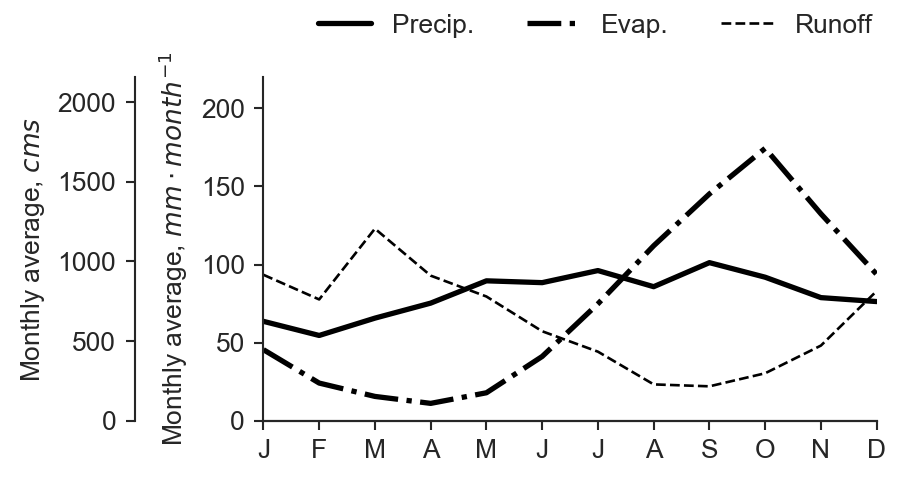

In [394]:
fig, ax = plt.subplots(1,1,figsize=(5,2.5),dpi=190)

# ax = axes[0]

ax.plot(Precip_mm[-15:].mean().to_frame()[1:-1], 'k-', lw=2, label='Precip.')
ax.plot(Evap_mm[-15:].mean().to_frame()[1:-2], 'k-.', lw=2, label='Evap.')
ax.plot(runoff_LE.sum(axis=1).groupby('month').mean().values/0.796/conversion_fac_mmy_to_cms/12, 'k--', lw=1, label='Runoff')
ax.set_xlim(0,11)
ax.set_ylim(0,220)
ax.set_ylabel('Monthly average, $mm\cdot month^{-1}$')
# ax.legend()

ax2 = ax.twinx()

ax2.spines["left"].set_position(("axes", -0.17)) # green one
ax2.spines["left"].set_visible(True)
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')

ax2.plot(Precip_mm[-15:].mean().to_frame()[1:-1]*conversion_fac_mmy_to_cms, 'k-', lw=0, label='Precipitaion')
ax2.plot(Evap_mm[-15:].mean().to_frame()[1:-2]*conversion_fac_mmy_to_cms, 'k-.', lw=0, label='Evaporation')
ax2.plot(runoff_LE.sum(axis=1).groupby('month').mean().values/0.796, 'k--', lw=0, label='Runoff')
ax2.set_ylim(0,220*conversion_fac_mmy_to_cms*12)
ax2.set_ylabel('Monthly average, $cms$')

plt.xticks(np.arange(0,12), ['J','F','M','A','M','J','J','A','S','O','N','D'])

sns.despine()
# sns.despine(left=False)
# sns.despine(trim=True, offset={'left':20,'right':10,'top':20,'bottom':13})

# ax.spines["left"].set_position(("axes", -0.05)) # green one
ax2.spines["left"].set_position(("axes", -0.21)) # green one
# ax.spines["bottom"].set_position(("axes", -0.05)) # green one
# ax2.spines["bottom"].set_position(("axes", -0.05)) # green one

handles, labels = ax.get_legend_handles_labels()
fig.legend( handles , labels , loc = (0.34, 0.9), ncol=3, frameon=0, framealpha=1)

fig.tight_layout(rect=[0, 0.0, 1, 0.97])

fig.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/LE_monthly_average.pdf', dpi=fig.dpi)
fig.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/LE_monthly_average.pdf', dpi=fig.dpi)




### St Clair

In [213]:
runoff_SC = flows_agg[set(flows_agg.columns.intersection(
    master_df[((master_df.basin=='SCR') | (master_df.basin=='SCL')) & (master_df.country=='US')
             ].STATION_NUMBER)) 
               - set(['02GG006', '02GC010', '04159492', '02GC030', '04165710', '02GA003', '02GC029', '04168000',
'04216220', '04216000', '02HA013', '02HA003', '04159130', '02GG014', '02GG005', '02GE002', 
'02GE006', '02GH016', '02HA019'])]

runoff_SC.sum(axis=1).groupby('month').mean()/0.67/conversion_fac_mmy_to_cms_st_clair/12

month
1      81.725759
2      74.519102
3     139.907757
4     119.137076
5     113.266190
6      58.491927
7      35.633930
8      35.904095
9      35.145198
10     34.606097
11     51.040645
12     72.008439
dtype: float64

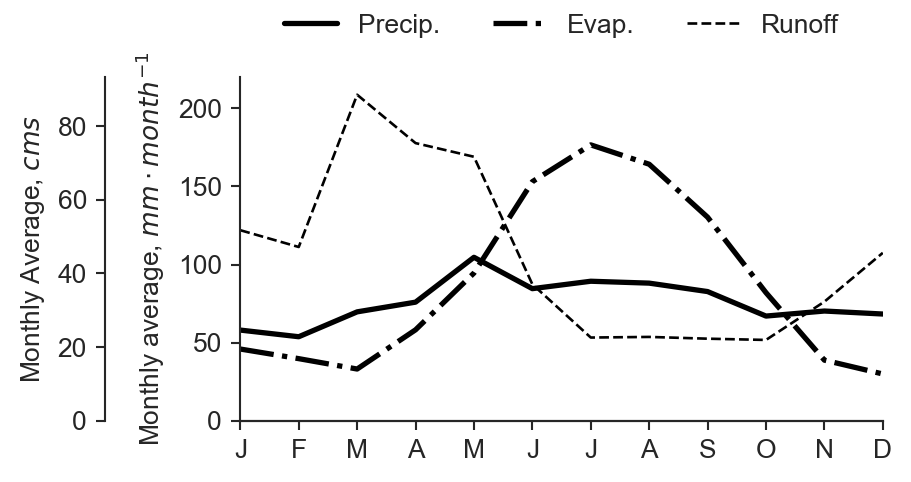

In [393]:
fig, ax = plt.subplots(1,1,figsize=(5,2.5),dpi=190)

# ax = axes[0]

ax.plot(Precip_mm_SC[-15:].mean().to_frame()[1:-1], 'k-', lw=2, label='Precip.')
ax.plot(Evap_mm_SC[-15:].mean().to_frame()[1:-2], 'k-.', lw=2, label='Evap.')
ax.plot(runoff_SC.sum(axis=1).groupby('month').mean().values/0.67/conversion_fac_mmy_to_cms_st_clair/12, 'k--', lw=1, label='Runoff')
ax.set_xlim(0,11)
ax.set_ylim(0,220)
ax.set_ylabel('Monthly average, $mm\cdot month^{-1}$')
# ax.legend(loc=(0.3,-0.05))

ax2 = ax.twinx()

ax2.spines["left"].set_position(("axes", -0.17)) # green one
ax2.spines["left"].set_visible(True)
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')

ax2.plot(Precip_mm_SC[-15:].mean().to_frame()[1:-1]*conversion_fac_mmy_to_cms_st_clair, 'k-', lw=0, label='Precip.')
ax2.plot(Evap_mm_SC[-15:].mean().to_frame()[1:-2]*conversion_fac_mmy_to_cms_st_clair, 'k-.', lw=0, label='Evap.')
ax2.plot(runoff_SC.sum(axis=1).groupby('month').mean().values/0.67, 'k--', lw=0, label='Runoff')
ax2.set_ylim(0,220*conversion_fac_mmy_to_cms_st_clair*12)
ax2.set_ylabel('Monthly Average, $cms$')

plt.xticks(np.arange(0,12), ['J','F','M','A','M','J','J','A','S','O','N','D'])

sns.despine()
# sns.despine(left=False)
# sns.despine(trim=True, offset={'left':20,'right':10,'top':20,'bottom':13})

ax2.spines["left"].set_position(("axes", -0.21)) # green one

handles, labels = ax.get_legend_handles_labels()

fig.legend( handles , labels , loc = (0.3, 0.9), ncol=3, frameon=0, framealpha=1)

fig.tight_layout(rect=[0, 0.0, 1, 0.97])

fig.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/SC_monthly_average.pdf', dpi=fig.dpi)
fig.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/SC_monthly_average.pdf', dpi=fig.dpi)




### Connecting channels

In [ ]:
runoff_LE = flows_agg[set(flows_agg.columns.intersection(
    master_df[~((master_df.basin=='SCR') | (master_df.basin=='SCL')) & (master_df.country=='US')
             ].STATION_NUMBER)) 
               - set(['02GG006', '02GC010', '04159492', '02GC030', '04165710', '02GA003', '02GC029', '04168000',
'04216220', '04216000', '02HA013', '02HA003', '04159130', '02GG014', '02GG005', '02GE002', 
'02GE006', '02GH016', '02HA019'])]

runoff_LE.sum(axis=1).groupby('month').mean()/conversion_fac_mmy_to_cms/12

In [240]:
flows_agg['04216000'].groupby('month').mean()

month
1     5656.197222
2     5537.034483
3     5660.275269
4     5851.502222
5     6033.608602
6     5948.008889
7     5964.180645
8     5834.778495
9     5619.288889
10    5603.372043
11    5651.084444
12    5753.849462
Name: 04216000, dtype: float64

In [261]:
# Detroit River as sum SCR and watershedd
DR = flows_agg[set(flows_agg.columns.intersection(
    master_df[((master_df.basin=='SCR') | (master_df.basin=='SCL')) & (master_df.country=='US')
             ].STATION_NUMBER)) 
               - set(['02GG006', '02GC010', '04159492', '02GC030', '04165710', '02GA003', '02GC029', '04168000',
'04216220', '04216000', '02HA013', '02HA003', '04159130', '02GG014', '02GG005', '02GE002', 
'02GE006', '02GH016', '02HA019'])].sum(axis=1).groupby('month').mean()/0.67 + flows_agg['04159130'].groupby('month').mean()

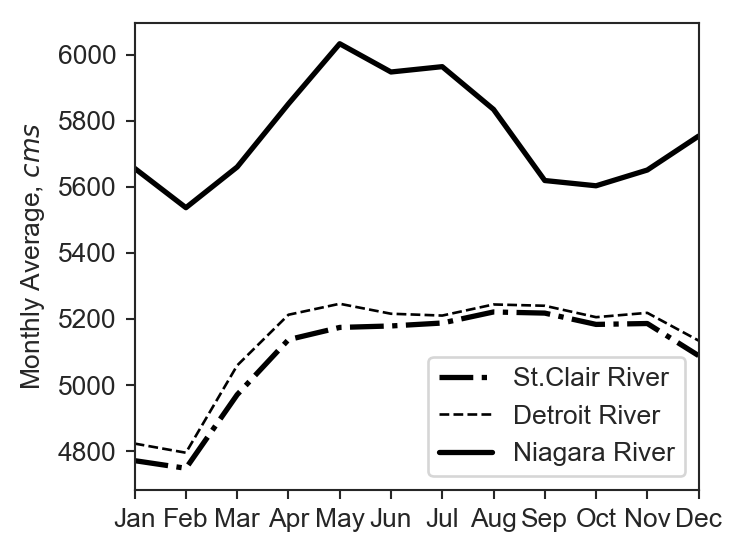

In [288]:
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=190)

# ax = axes[0]

ax.plot(flows_agg['04159130'].groupby('month').mean(), 'k-.', lw=2, label='St.Clair River')
ax.plot(DR, 'k--', lw=1, label='Detroit River')
ax.plot(flows_agg['04216000'].groupby('month').mean(), 'k-', lw=2, label='Niagara River')
# ax.plot(Evap_mm_SC[-15:].mean().to_frame()[1:-2], 'k-.', lw=2, label='Evaporation')
# ax.plot(runoff_SC.sum(axis=1).groupby('month').mean().values/0.67/conversion_fac_mmy_to_cms_st_clair/12, 'k--', lw=1, label='Runoff')
ax.set_xlim(1,12)
plt.xticks(np.arange(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# ax.set_ylim(0,220)
ax.set_ylabel('Monthly Average, $cms$')
ax.legend()
plt.tight_layout()
fig.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_figures/img/CC_monthly_average.pdf', dpi=fig.dpi)
fig.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Water Budget/latex_draft/img/CC_monthly_average.pdf', dpi=fig.dpi)
